# Part 1 - Drug Efficacy Heterogeneity Study using Coefficients of PK/PD

In [469]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Oct  9 11:38:48 2020

@author: harshparikh
"""
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def set_ds(data,col_y,max_depth=2):
    data_prime = data.copy(deep=True)
    data_prime = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders',col_y]].dropna()
    Y = data_prime[col_y]
    X = data_prime[['Gender', 'Age', 'marrital',
           'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
           'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
           'Hx of HLD', 'Hx tobacco (including ex-smokers)',
           'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
           'Hx other substance abuse, any time in their life',
           'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
           'premorbid MRS before admission  (modified ranking scale),before admission',
           'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
           'hydrocephalus  (either on admission or during hospital course)   QPID',
           'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
           'diastolic BP', 'Midline shift with any reason ( Document Date)',
           'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
           'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
           'Worst GCS Intubation status', 'iGCS actual scores',
           'neuro_dx_Seizures/status epilepticus',
           'prim_dx_Respiratory disorders']]
    model = tree.DecisionTreeRegressor(max_depth=max_depth,min_samples_split=10,min_samples_leaf=8).fit(X,Y)
    print(model.score(X,Y))
    return X,Y,model

In [470]:
data = pd.read_csv('/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/simulator/results/params_cauchy_expit_ARMA16_iter1000.csv',index_col=0)
data.head()

FileNotFoundError: [Errno 2] File b'/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/simulator/results/params_cauchy_expit_ARMA16_iter1000.csv' does not exist: b'/Users/harshparikh/Documents/GitHub/iic_causal_inference/aim1/simulator/results/params_cauchy_expit_ARMA16_iter1000.csv'

In [3]:
col_y = 'alpha0'
X,Y,model = set_ds(data,col_y,max_depth=3)

0.11900694678182511


In [4]:
X.columns

Index(['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGC

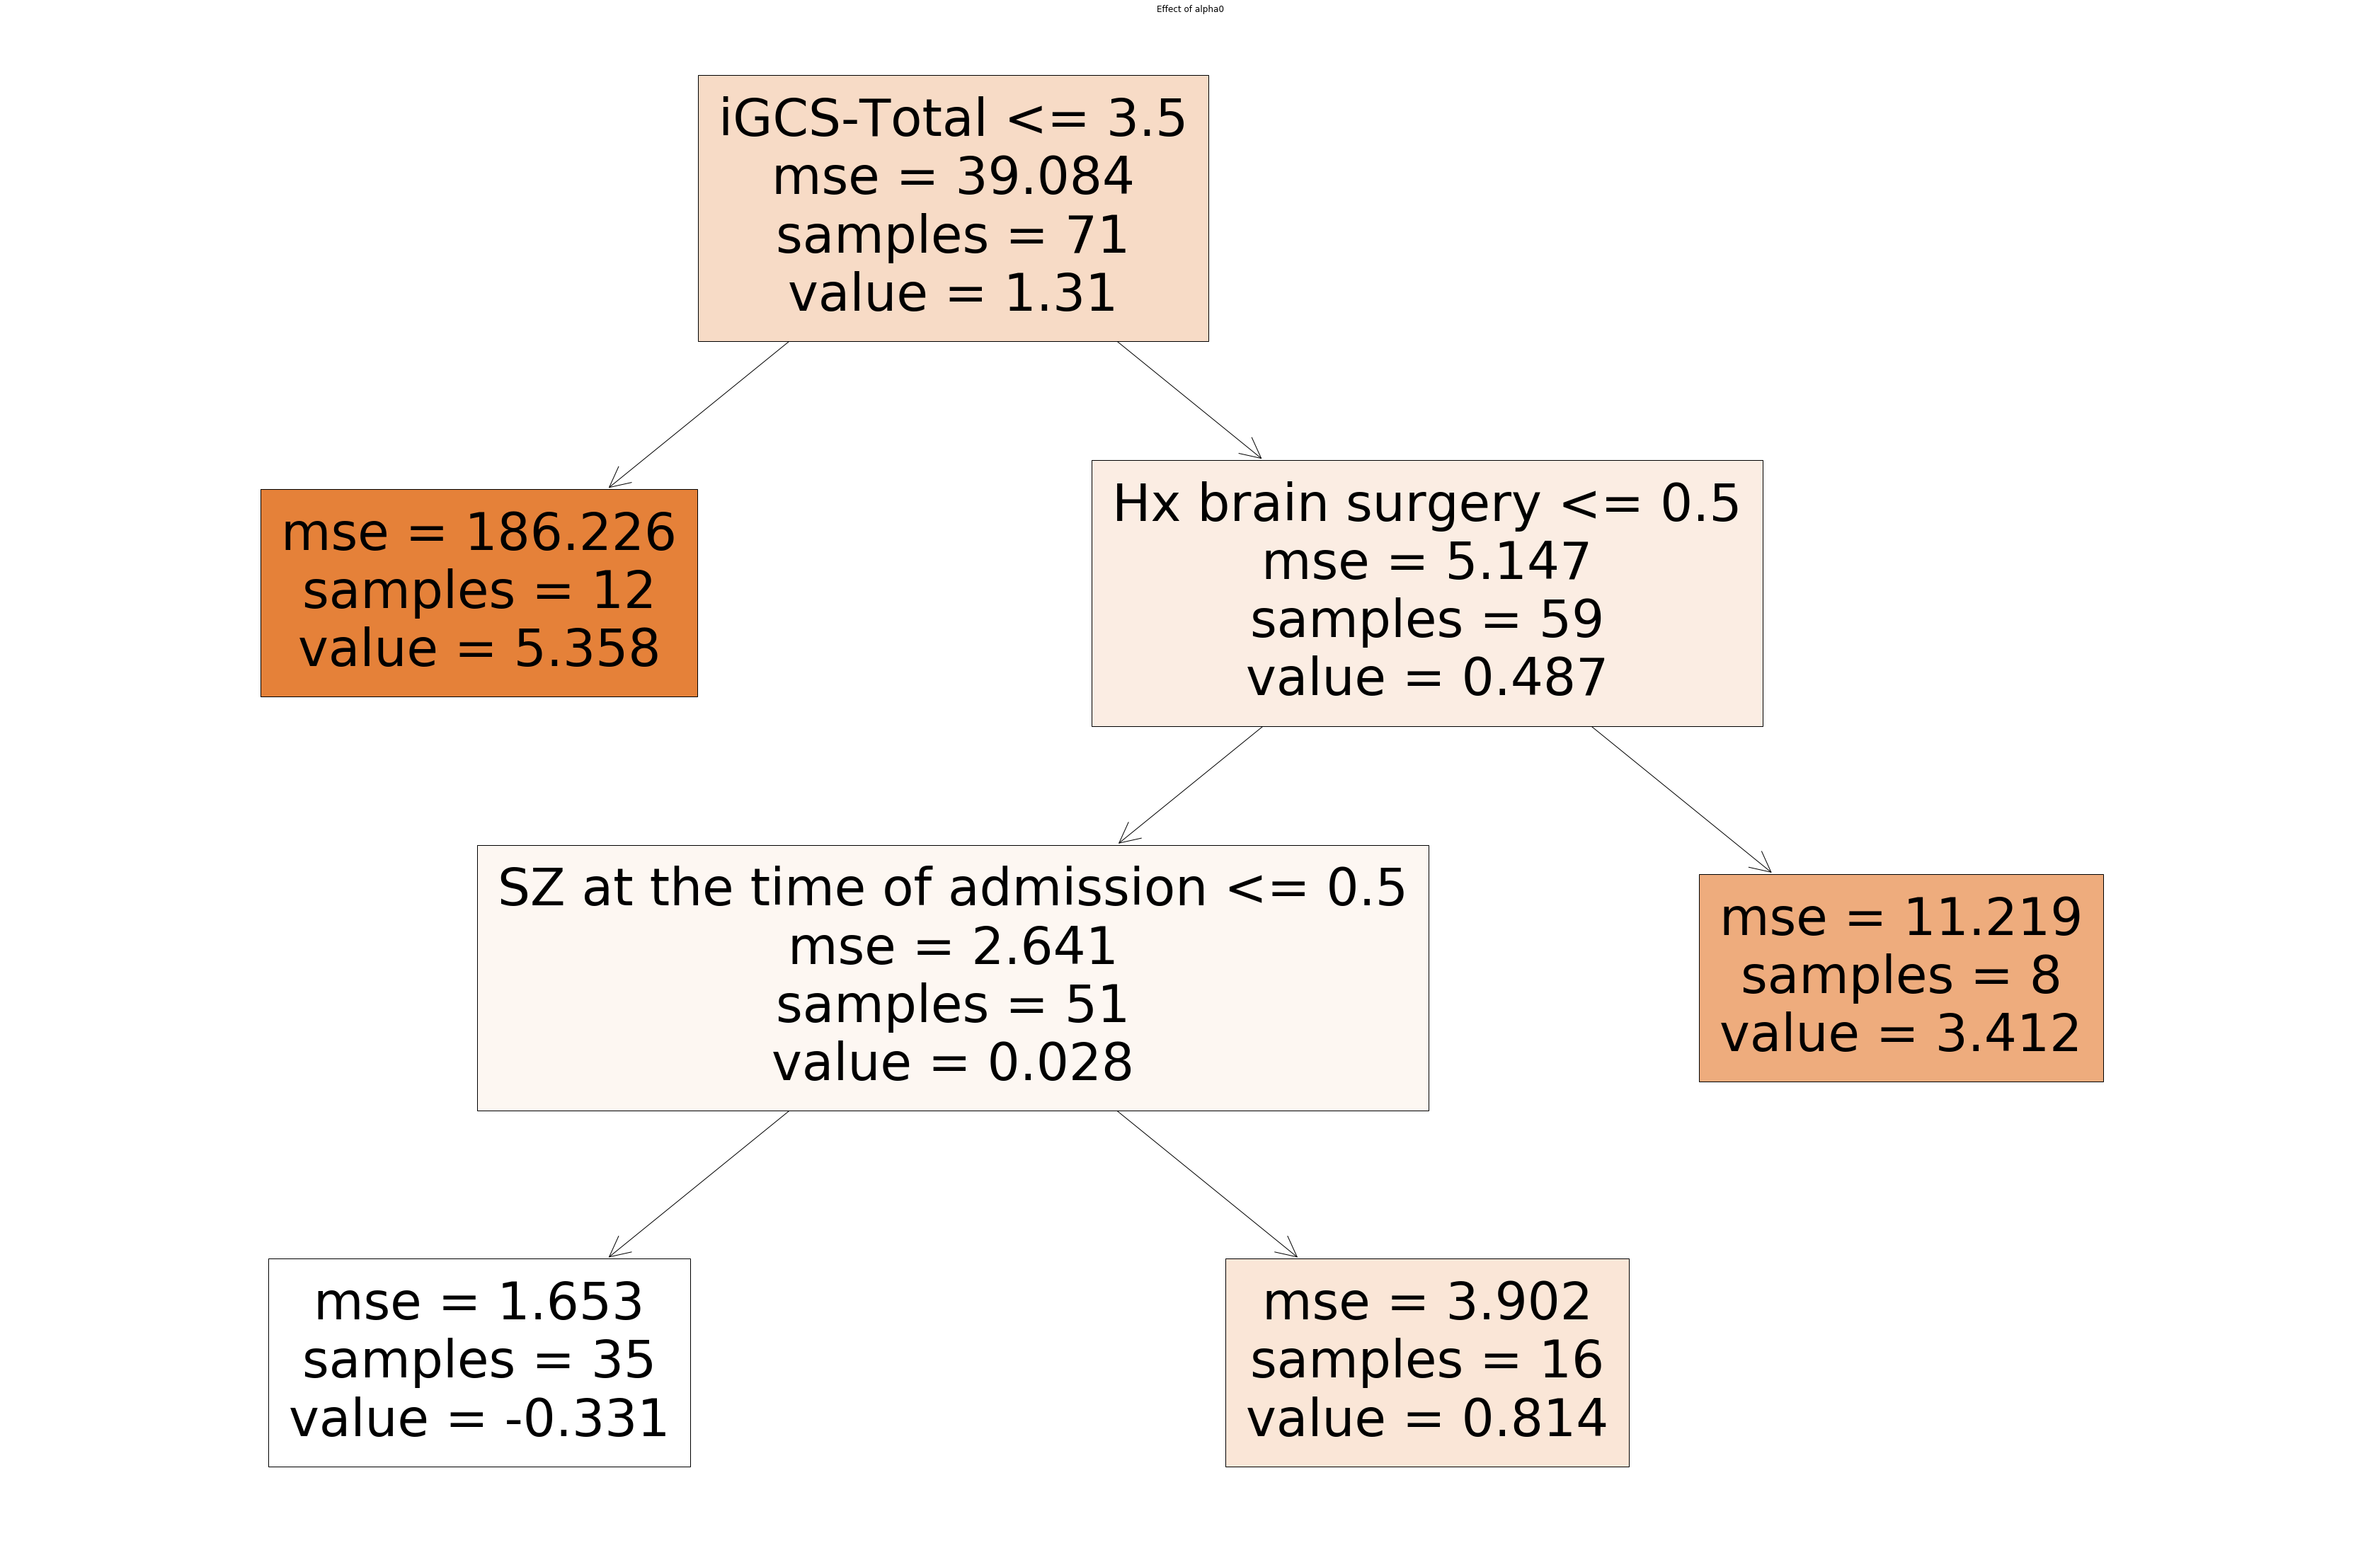

In [6]:
fig,ax = plt.subplots(figsize=(60,40))
tree.plot_tree(model,ax=ax,
               feature_names=['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at the time of admission',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGCS-E',
       'iGCS-V', 'iGCS-M', 'Worst GCS in 1st 24',
       'Worst GCS Intubation status', 'iGCS actual scores',
       'neuro_dx_Seizures/status epilepticus',
       'prim_dx_Respiratory disorders'],filled = True)
plt.title('Effect of %s'%(col_y))
fig.savefig('importance_tree_%s.png'%(col_y))

In [50]:
X.shape

(71, 36)

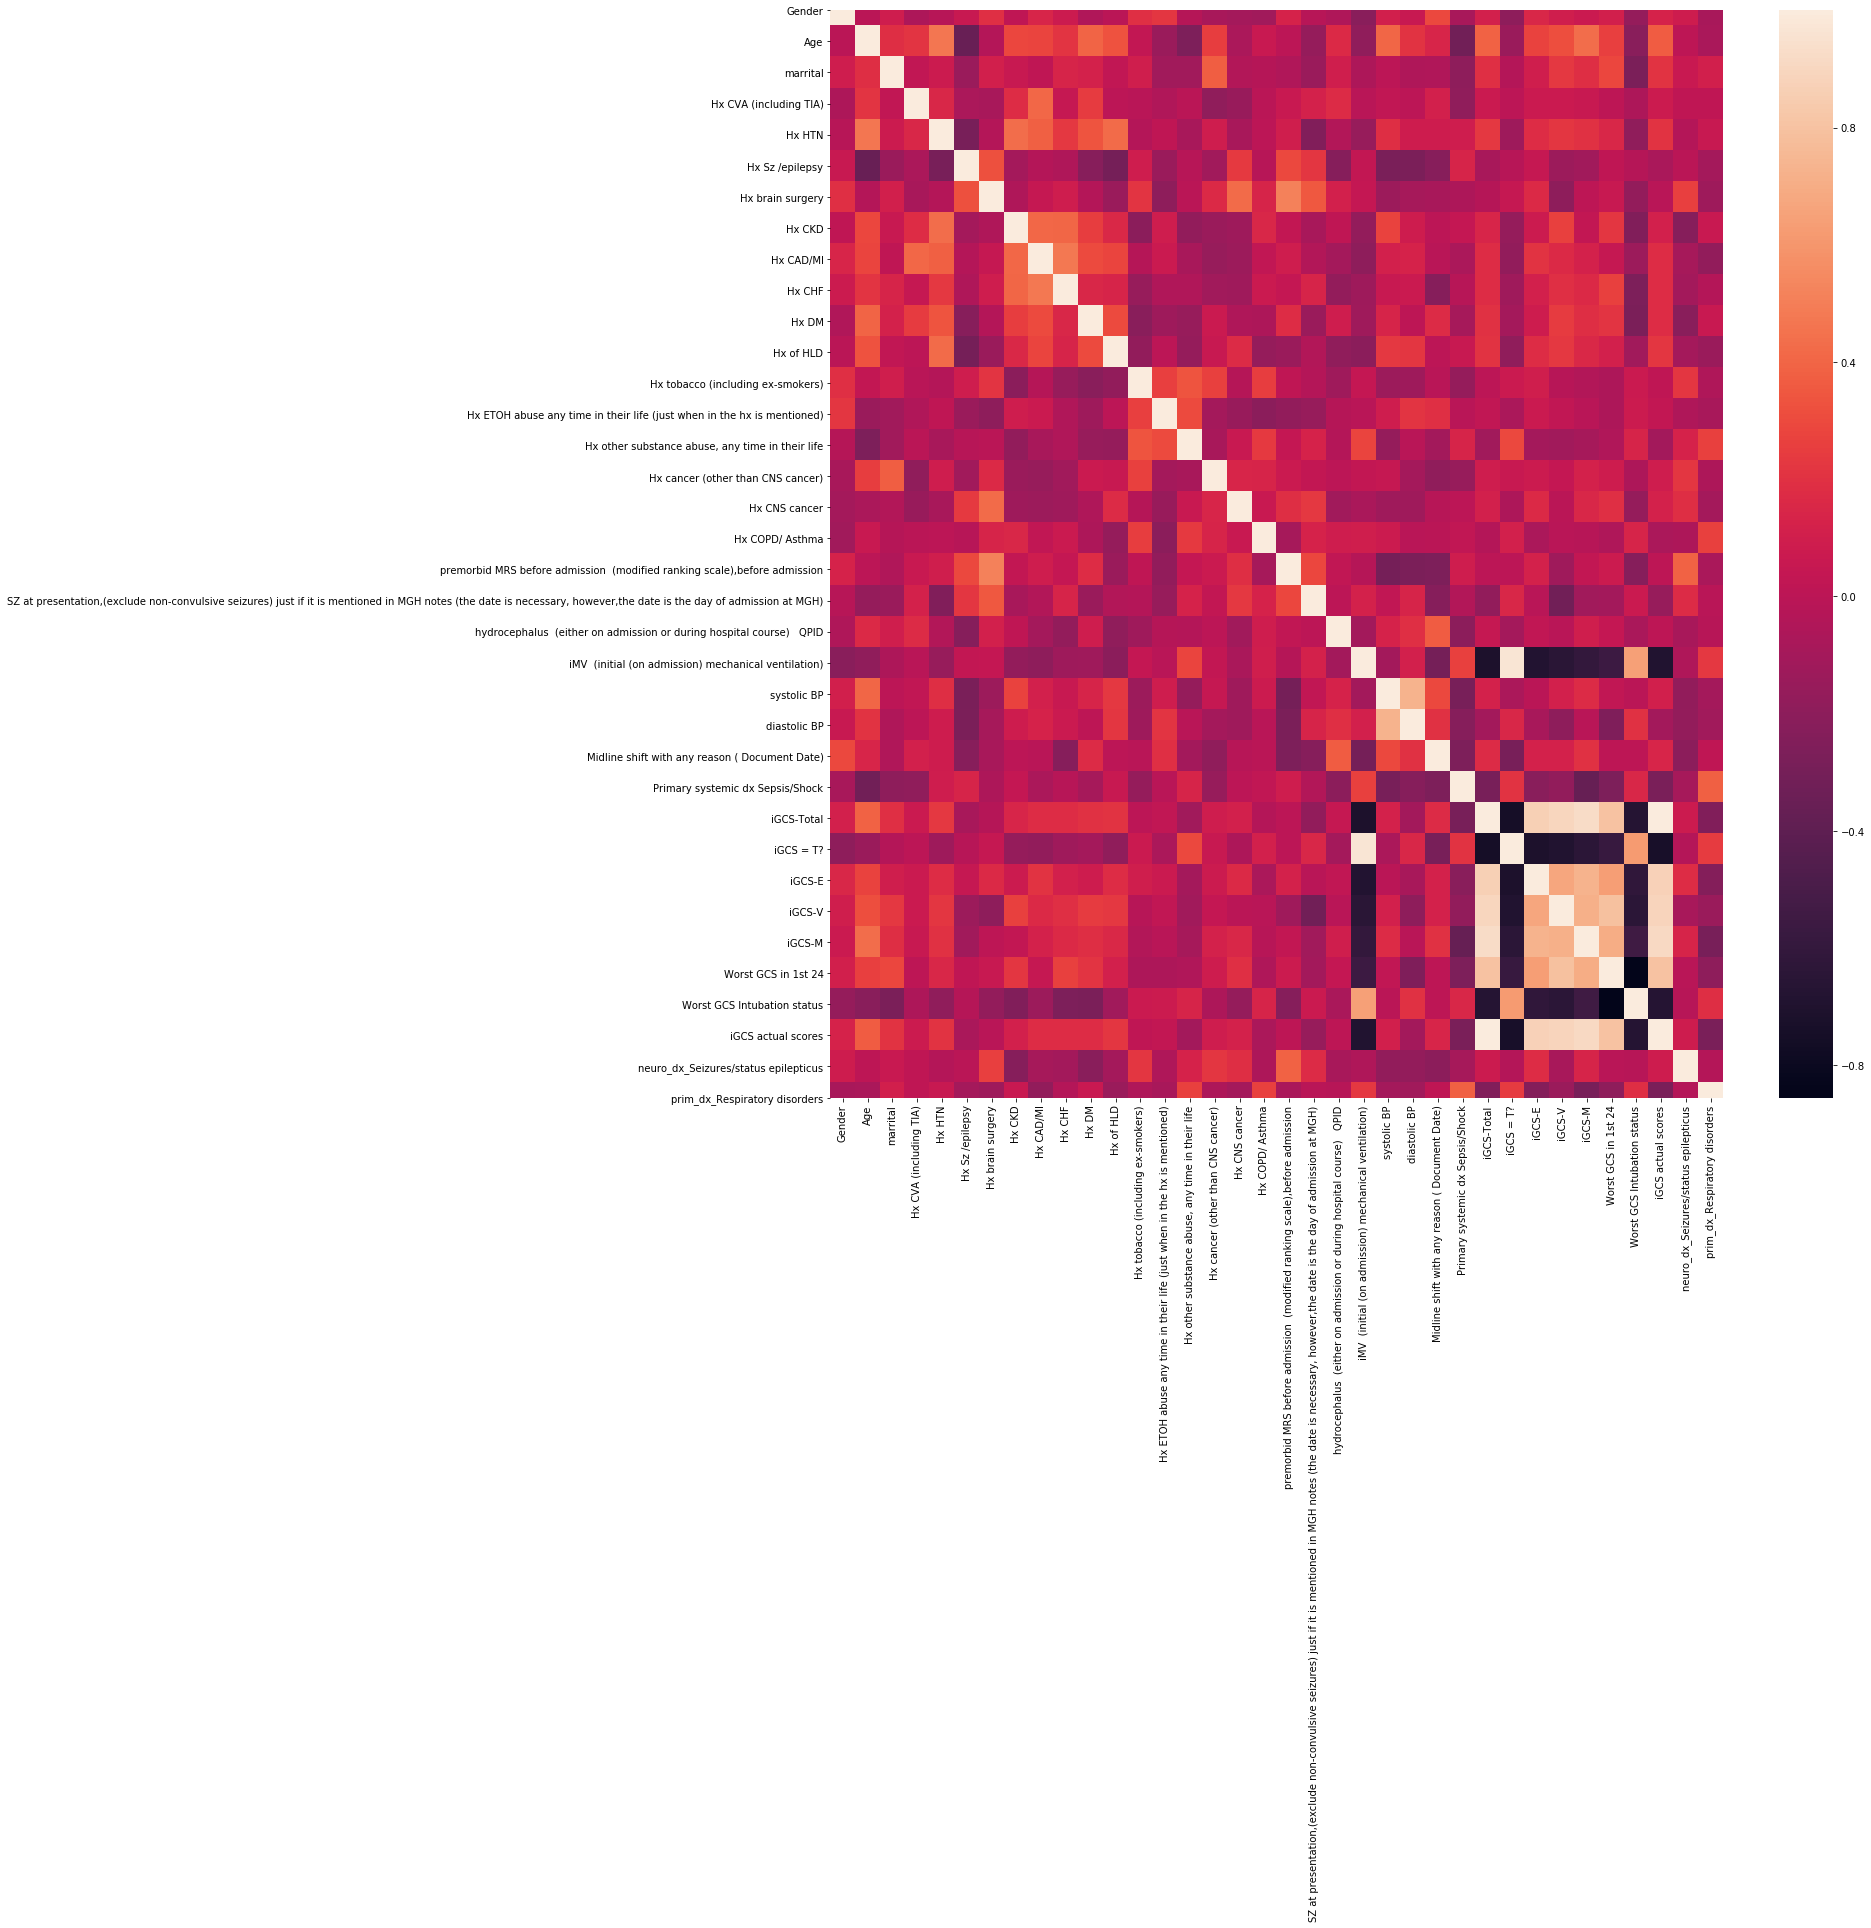

In [7]:
C_correlation = np.corrcoef(X,rowvar=False)
fig = plt.figure(figsize=(20,20))
sns.heatmap(C_correlation)
plt.xticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=90)
plt.yticks(np.arange(C_correlation.shape[0])+0.5,X.columns,rotation=0)
fig.savefig('correlation_c.png')

# Part 2 - Observational Study for Efficacy of Drugs

Let's start with studying the efficacy of Midazolam

### Reading Patients' Data


In [2]:
import numpy as np
import pandas as pd
import sklearn.tree as tree
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.io as sio
import tqdm
import os
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm

data_dir = '/Users/harshparikh/IIC/step1_output/'

In [3]:
covariates = pd.read_csv(data_dir+'covariates.csv',index_col=0)
covariates.head()

,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
Index,,,,,,,,,,,,,,,,,,,,,
sid36,0,73.84,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,9,0,4,1,4,3,1,9,0,0
sid39,0,70.77,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,...,9,0,4,1,4,9,0,9,1,0
sid56,1,82.84,0.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,...,12,0,4,3,5,3,1,12,1,0
sid297,0,58.95,1.0,NaN,1.0,1.0,1.0,0.0,1.0,1.0,...,15,0,4,5,6,15,0,15,0,0
sid327,0,45.47,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,7,1,1,1,5,7,1,7,1,0


In [4]:
outcomes = pd.read_csv(data_dir+'outcomes.csv',index_col=0)
outcomes.head()

,DC MRS (modified ranking scale),DC GOSE (extended glasgow outcome scale),"DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5"
Index,,,
sid36,4,3.0,2.0
sid39,4,3.0,2.0
sid56,5,3.0,2.0
sid297,3,4.0,1.0
sid327,6,1.0,5.0


In [5]:
def get_pk_k():
    halflife = pd.DataFrame({
        'lacosamide':[13],
        'levetiracetam':[6],
        'midazolam':[1.5],
        'pentobarbital':[15],
        'phenobarbital':[53],
        'phenytoin':[22],
        'propofol':[1.5],
        'valproate':[8]
        },index=['t1/2'])
    halflife = halflife.append(np.log(2) / halflife.rename(index={'t1/2':'k'}))
    PK_K = halflife.loc['k']
    return PK_K
    
def drug_concentration(d_ts,k):
    """
    d_ts.shape = (#drug, T)
    """
    k_ts = np.array([ np.exp(-k*t) for t in range(d_ts.shape[1]) ]).T
    conc = np.array([np.convolve(d_ts[i],k_ts[i],'full') for i in range(d_ts.shape[0])])
    conc = conc[:,:d_ts.shape[1]]
    return conc


# # data functions


def patient(path, W):
    window = W
    step   = W
    
    #if '.mat' in path:
    mat = sio.loadmat(path)
    human_iic = mat['human_iic'].flatten().astype(float)
    spike = mat['spike'].flatten().astype(float)
    drugs = mat['drugs_weightnormalized'].astype(float)
    artifact = mat['artifact'].flatten().astype(float)
    freq = mat['spec_freq'].flatten().astype(float)
    spec = mat['spec'].astype(float)
    human_iic[artifact==1] = np.nan
    spike[artifact==1] = np.nan

    drugnames = list(map(lambda x: x.strip(), mat['Dnames']))
    drugs_window = np.array([ np.mean(drugs[i:i+window],axis=0) for i in range(0,len(drugs),step) ])

    sz_burden = (human_iic==1).astype(float)
    sz_burden[np.isnan(human_iic)] = np.nan
    sz_burden_window = np.array([np.nanmean(sz_burden[i:i+window]) for i in range(0, len(sz_burden),step)])

    iic_burden = np.in1d(human_iic, [1,2,3,4]).astype(float)
    iic_burden[np.isnan(human_iic)] = np.nan
    iic_burden_window = np.array([np.nanmean(iic_burden[i:i+window]) for i in range(0, len(iic_burden),step)])

    spike_rate_window = np.array([np.nanmean(spike[i:i+window]) for i in range(0, len(spike),step)])

    spec_window = np.array([np.nanmean(spec[i:i+window], axis=0) for i in range(0, len(spec),step)])
    
    res = {'sz_burden': sz_burden_window,
           'iic_burden': iic_burden_window,
           'spike_rate': spike_rate_window,
           'spec': spec_window,
           'freq': freq}
    for i, dn in enumerate(drugnames):
        res[dn] = drugs_window[:,i]
    return res


# In[6]:


def preprocess(sid, data_dir, PK_K, W, drugs_tostudy):  # previsously called patient_data

    #fetch the data
    p = patient(os.path.join(data_dir, sid + '.mat'), W)

    #setting up the data
    response_tostudy = 'iic_burden'
    Pobs = p[response_tostudy]

    #PK
    Ddose = np.array([p[x] for x in drugs_tostudy])
    D = drug_concentration(Ddose, PK_K[drugs_tostudy].values).T

    #cov_tostudy = ['Age']
    C = pd.read_csv(os.path.join(data_dir, 'covariates.csv'))
    Cname = list(C.columns)
    C = C[C.Index==sid].iloc[0]#[cov_tostudy]
    
    return Pobs, response_tostudy, D, drugs_tostudy, C, Cname, p['spec'], p['freq']


In [6]:
patients = {}

sids = ['sid2', 'sid8', 'sid13', 'sid17', 'sid18', 'sid30', 'sid36', 'sid39', 'sid54',
        'sid56', 'sid69', 'sid77', 'sid82', 'sid88', 'sid91', 'sid92', 'sid297', 'sid327',
        'sid385', 'sid395', 'sid400', 'sid403', 'sid406', 'sid424', 'sid450', 'sid456',
        'sid490', 'sid512', 'sid551', 'sid557', 'sid734', 'sid736', 'sid801', 'sid821',
        'sid824', 'sid827', 'sid832', 'sid833', 'sid834', 'sid839', 'sid848', 'sid849',
        'sid852', 'sid872', 'sid876', 'sid880', 'sid881', 'sid884', 'sid886',
        'sid915', 'sid940', 'sid942', 'sid944', 'sid952', 'sid960', 'sid965', 'sid967',
        'sid983', 'sid987', 'sid988', 'sid994', 'sid1002', 'sid1006', 'sid1016', 'sid1022',
        'sid1025', 'sid1034', 'sid1038', 'sid1039', 'sid1055', 'sid1056', 'sid1063', 'sid1113',
        'sid1116', 'sid1337', 'sid1913', 'sid1915', 'sid1916', 'sid1917', 'sid1928', 'sid1956', 'sid1966']

drugs_tostudy = ['lacosamide', 'levetiracetam', 'midazolam','propofol', 'valproate']
    
PK_K = get_pk_k()

W = 300
Pobs = {}
D = {}
# spec = []
# freq = []
for sid in tqdm.tqdm(sids):
    Pobs_, Pname, D_, Dname, C_, Cname, spec_, freq_ = preprocess(sid, data_dir, PK_K, W, drugs_tostudy)
    Pobs_ = pd.DataFrame(Pobs_.reshape(-1,1),columns=[Pname])
    D_ = pd.DataFrame(D_,columns=Dname)
    Pobs[sid] = Pobs_
    D[sid] = D_

  0%|          | 0/82 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: Mean of empty slice
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Mean of empty slice
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: Mean of empty slice
100%|██████████| 82/82 [00:24<00:00,  3.33it/s]


In [7]:
covariates.loc[sids].head()

,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
Index,,,,,,,,,,,,,,,,,,,,,
sid2,0,85.01,0.0,NaN,0.0,1.0,0.0,0.0,1.0,0.0,...,7,0,1,2,4,3,1,3,0,1
sid8,0,67.24,0.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,12,0,4,2,6,11,0,12,1,0
sid13,0,48.12,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,4,1,5,3,1,10,1,0
sid17,0,35.03,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,...,8,0,1,2,5,8,0,8,0,0
sid18,1,60.20,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,...,4,1,2,1,1,4,1,4,1,0


In [8]:
outcomes.loc[sids].head()

,DC MRS (modified ranking scale),DC GOSE (extended glasgow outcome scale),"DC dispo home=1, rehab=2, SNF =3, hospice =4, dead =5"
Index,,,
sid2,5,2.0,4.0
sid8,4,4.0,2.0
sid13,5,2.0,2.0
sid17,6,1.0,5.0
sid18,5,2.0,2.0


In [9]:
def intervention_information(Pobs,D,sids,f=6):
    Pobs_pre, intervention, outcome, time_of_int = {}, {}, {}, {}
    for sid in sids:
        t = np.min(D[sid].loc[D[sid].sum(axis=1) > 0].index)
        Pobs_pre[sid] = Pobs[sid].loc[:t]['iic_burden']
        intervention[sid] = D[sid].loc[t]
        outcome[sid] = Pobs[sid].loc[t:t+f]['iic_burden'].to_numpy()
        time_of_int[sid] = t
    return pd.DataFrame.from_dict(Pobs_pre,orient='index'), pd.DataFrame.from_dict(intervention,orient='index'), pd.DataFrame.from_dict(outcome,orient='index'), pd.DataFrame.from_dict(time_of_int,orient='index')

In [10]:
f=12
Pobs_pre, intervention, short_term_outcome, time_of_int = intervention_information(Pobs,D,sids,f)

In [11]:
distance = lambda x,y: np.linalg.norm(x-y)
def neighbors(x,S,k=1):
    d_array = list( map( lambda y: distance(x,y), S.to_numpy() ) )
    kneighbor = S.index[np.argpartition(d_array, k)[:k]]
    return kneighbor

In [12]:
Sc = Pobs_pre.loc[intervention['midazolam']==0].max(axis=1)
St = Pobs_pre.loc[intervention['midazolam']>0].max(axis=1)

  9%|▊         | 7/82 [00:00<00:10,  7.11it/s]

sid30


 52%|█████▏    | 43/82 [00:04<00:03, 10.38it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
 55%|█████▍    | 45/82 [00:04<00:03, 10.47it/s]/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through 

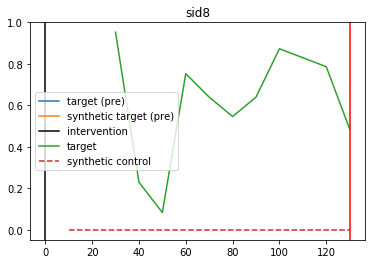

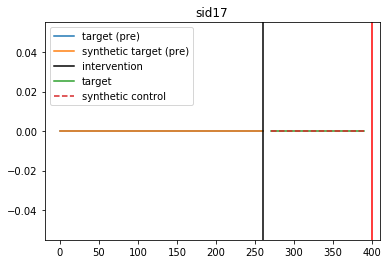

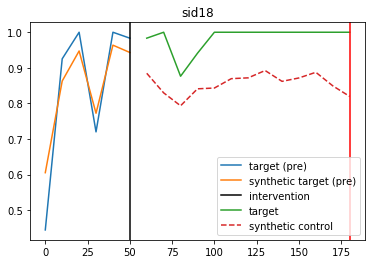

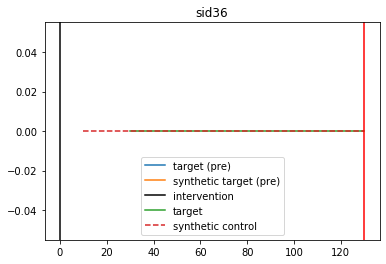

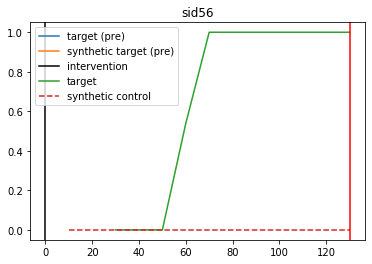

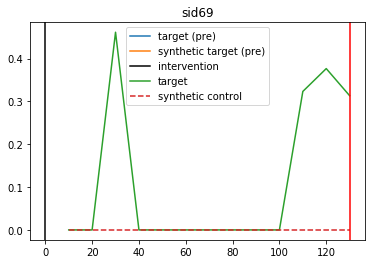

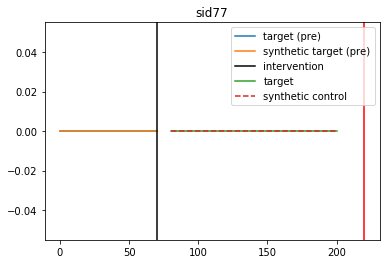

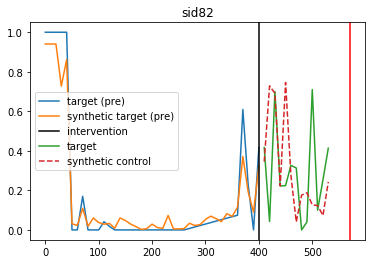

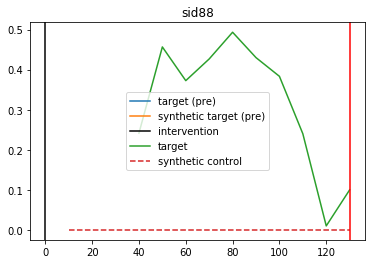

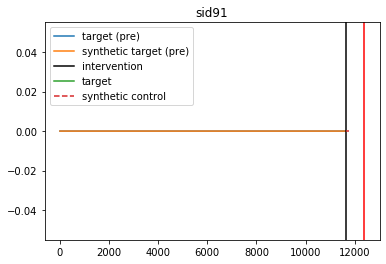

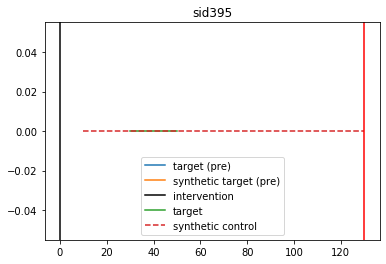

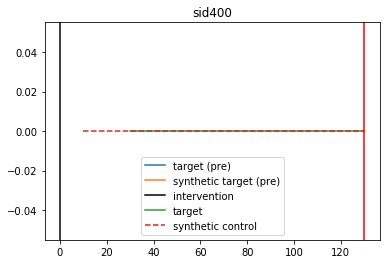

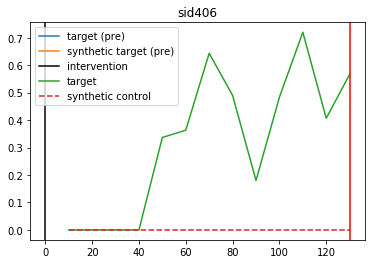

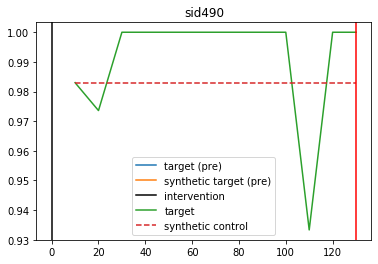

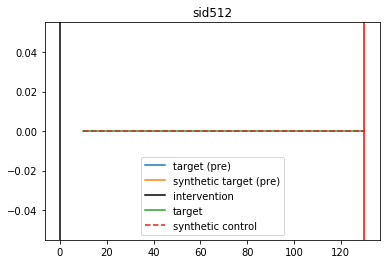

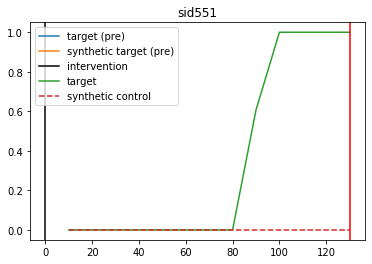

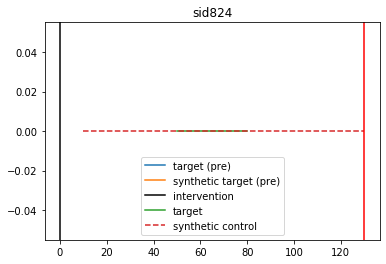

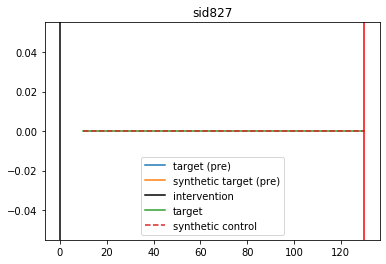

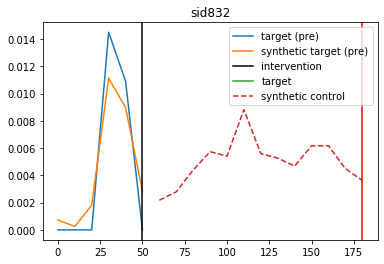

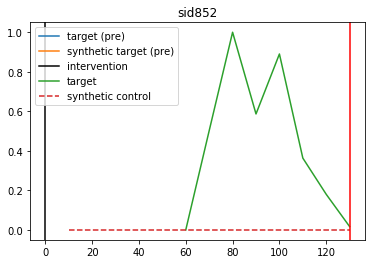

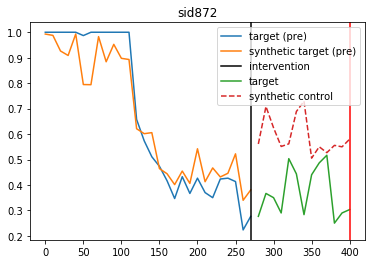

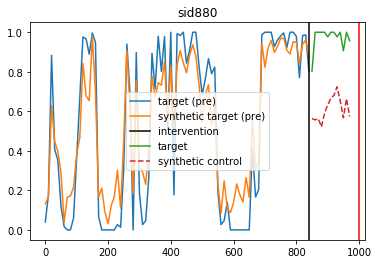

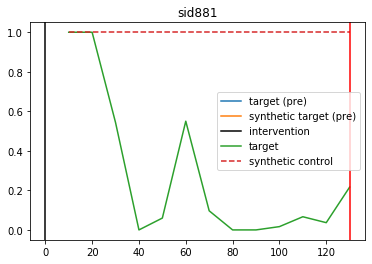

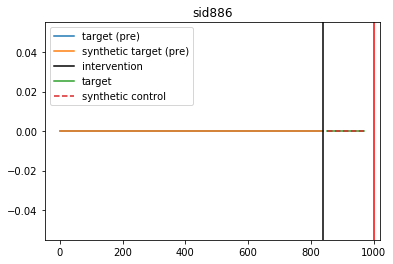

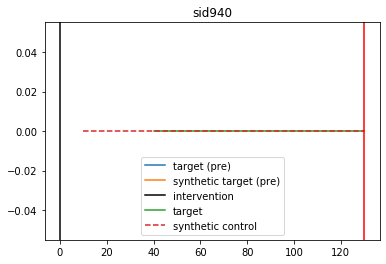

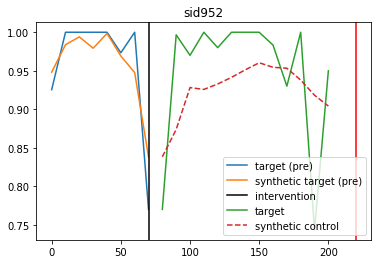

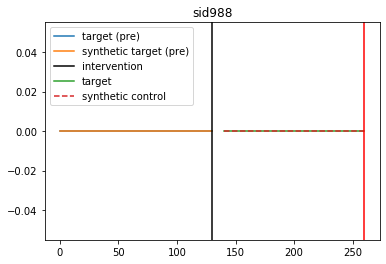

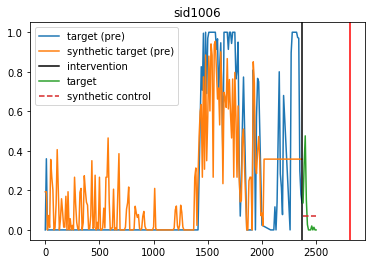

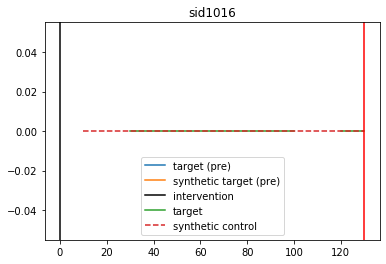

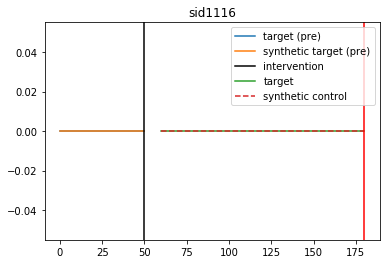

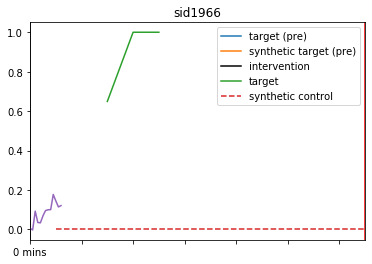

In [13]:
#Synthetic Control
T = intervention['propofol']>0
TE_propofol = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
#             model = lm.Ridge().fit(x0,x) x = \sum_j w_j x0_j 
            model = ensemble.RandomForestRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_propofol.append(y1-y0_predict)
        except:
            print(sid)
TE_propofol_df = pd.DataFrame(TE_propofol).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
TE_propofol_df.mean(axis=0).plot()

100%|██████████| 82/82 [00:00<00:00, 106.31it/s]


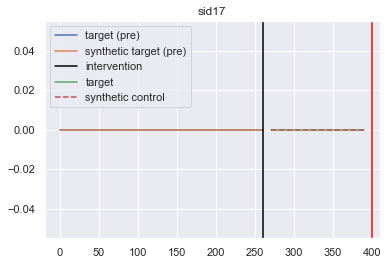

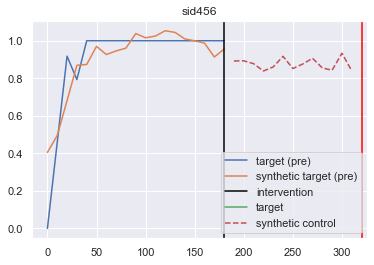

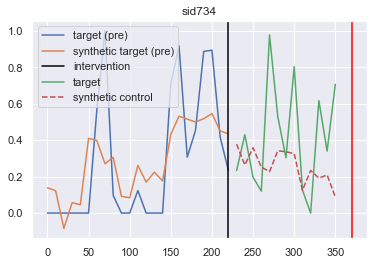

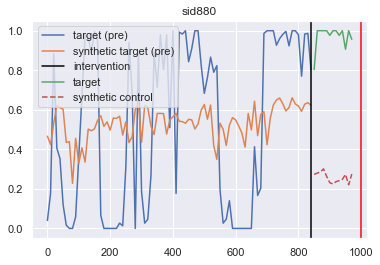

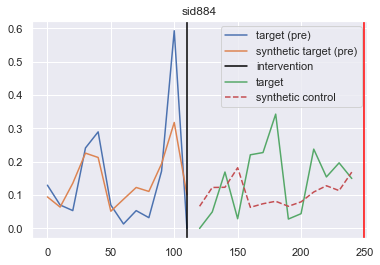

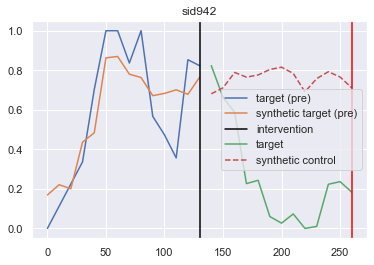

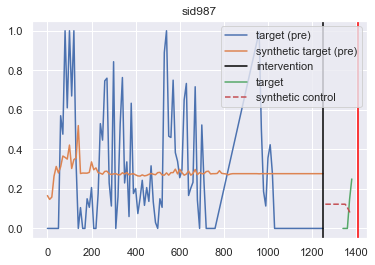

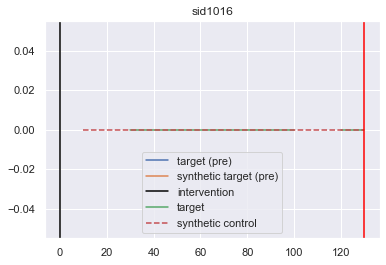

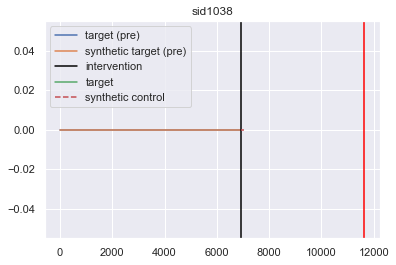

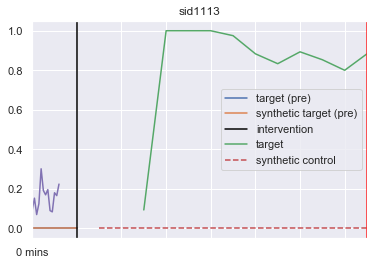

In [14]:
#Synthetic Control
sns.set()
T = intervention['midazolam']>0
TE_midazolam = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids[:]):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T 
        #for a control unit, the time of first intervention has to be after (f+time of first intervention for unit i)
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
#             model = ensemble.AdaBoostRegressor().fit(x0,x)
            model = lm.Ridge().fit(x0,x) # x = \sum_j w_j x0_j --> I found this w_j
#             model = ensemble.RandomForestRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0) #syn_y0 = \sum_j w_j y0_j
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_midazolam.append(y1-y0_predict)
            
        except:
            print(sid)
TE_midazolam_df = pd.DataFrame(TE_midazolam).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
TE_midazolam_df.mean(axis=0).plot()

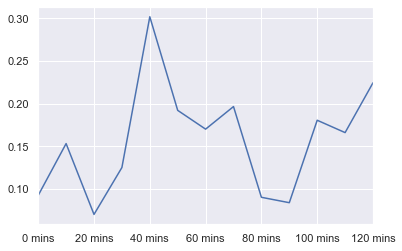

In [15]:
TE_midazolam_df.mean(axis=0).plot() #average(y1 - y0) : negative means drug is working as expected, positive is weird

100%|██████████| 82/82 [00:01<00:00, 60.10it/s]


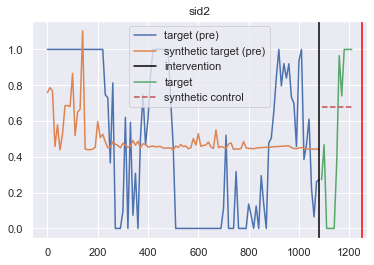

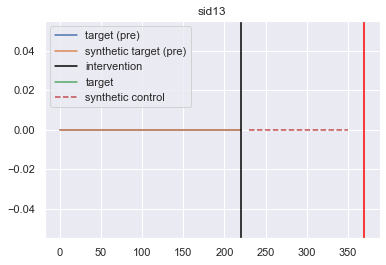

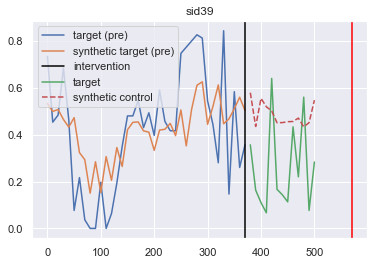

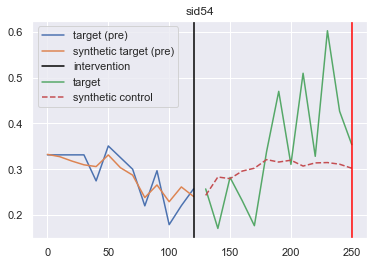

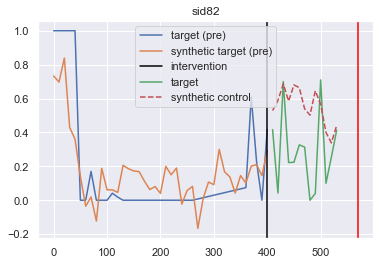

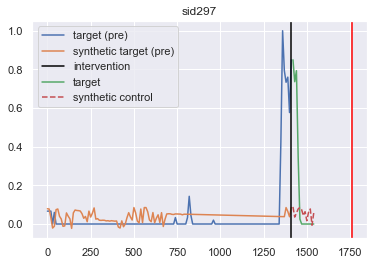

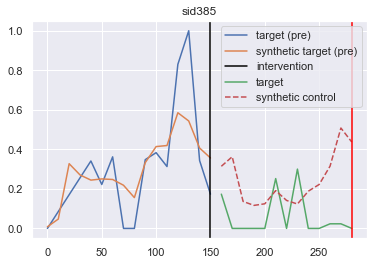

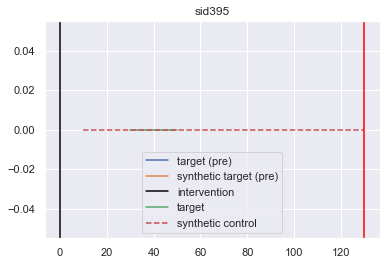

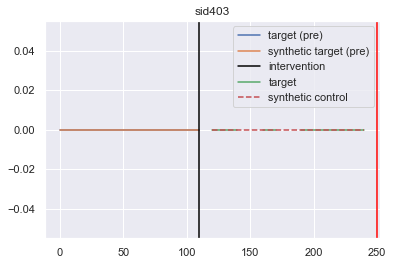

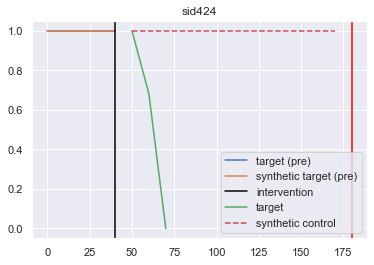

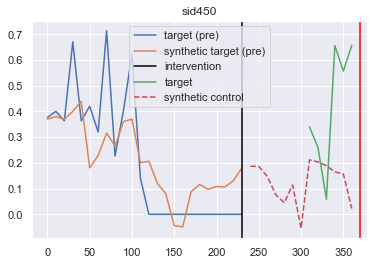

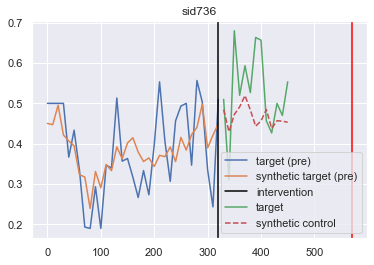

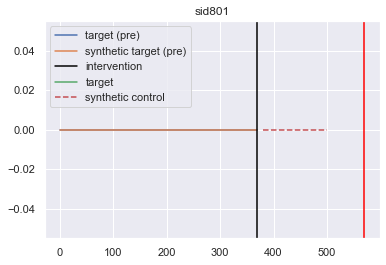

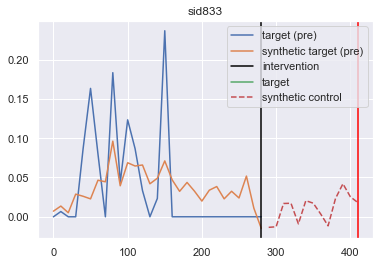

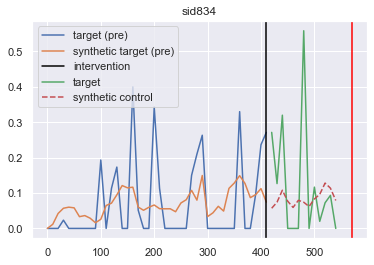

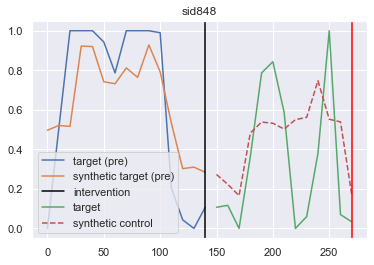

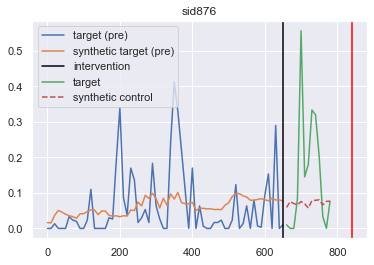

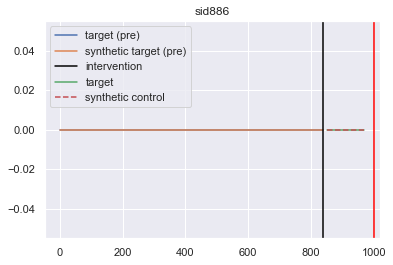

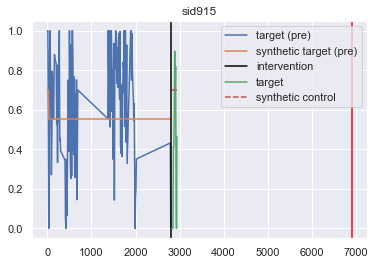

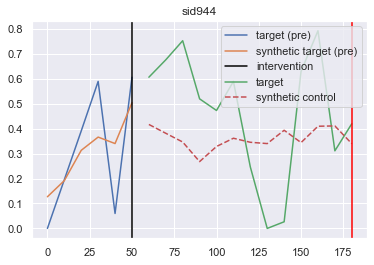

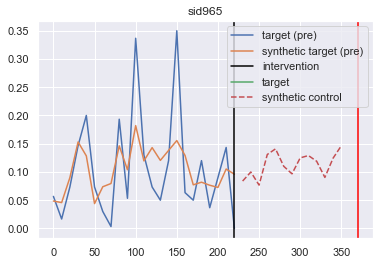

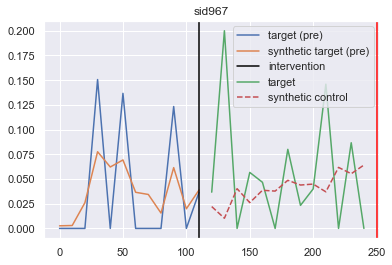

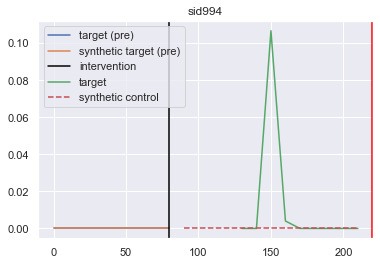

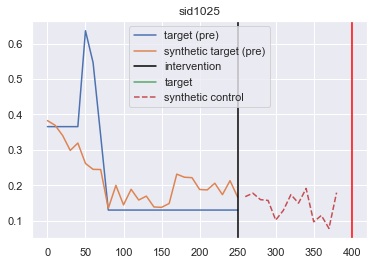

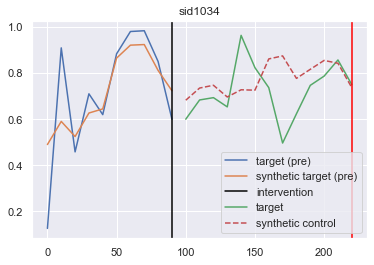

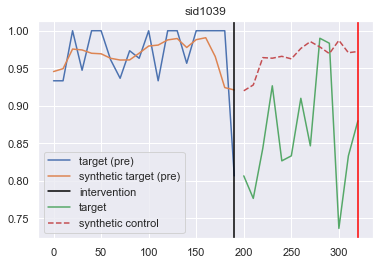

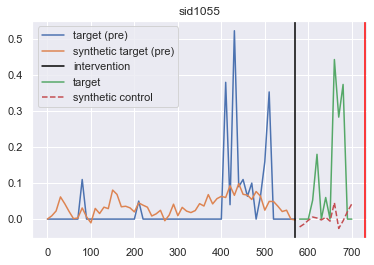

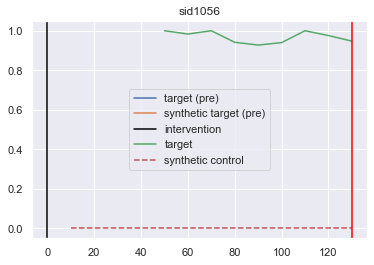

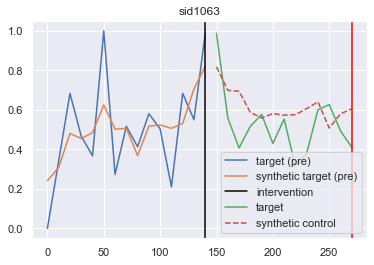

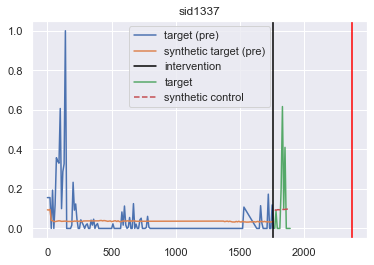

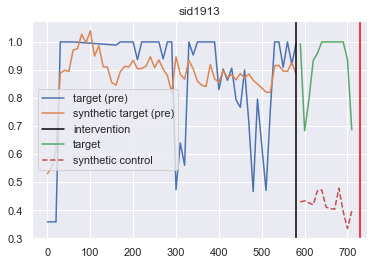

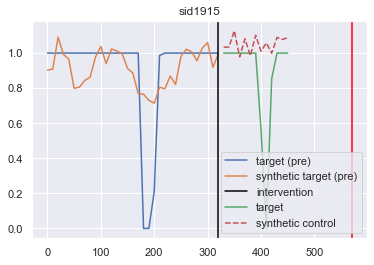

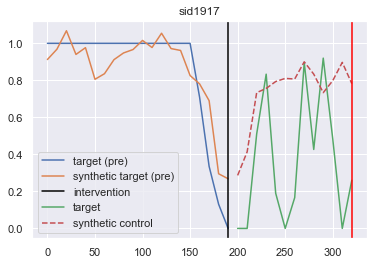

In [480]:
#Synthetic Control
T = intervention['levetiracetam']>0
TE_lev = []
import sklearn.ensemble as ensemble
for sid in tqdm.tqdm(sids):
    t = T.loc[sid]
    if t:
        x = Pobs_pre.loc[sid,:time_of_int[0].loc[sid]].interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        y1 = short_term_outcome.loc[sid]
        x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0:time_of_int[0].loc[sid]].T
        x0 = x0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
        try:
            model = lm.Ridge().fit(x0,x)
#             model = ensemble.ExtraTreesRegressor().fit(x0,x)
            fig=plt.figure()
            plt.title(sid)
            plt.plot(10*np.arange(0,len(x)),x)
            plt.plot(10*np.arange(0,len(x)),model.predict(x0))
#             plt.plot(np.arange(0,len(x)),np.mean(x0,axis=1))
            plt.axvline(10*time_of_int[0].loc[sid],c='black')
            y0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,time_of_int[0].loc[sid]:time_of_int[0].loc[sid]+f].T
            y0 = y0.interpolate(method='linear', limit_direction='forward', axis=0).fillna(method='bfill').fillna(0)
            y0_predict = model.predict(y0)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),y1)
            plt.plot(10*np.arange(len(x),len(x)+len(y1)),model.predict(y0),'--')
#             plt.plot(np.arange(len(x),len(x)+len(y1)),np.mean(y0,axis=1),'*')
            plt.axvline(10*np.min(time_of_int.loc[time_of_int[0]>time_of_int[0].loc[sid]+f,0]),c='red')
            plt.legend(['target (pre)','synthetic target (pre)','intervention','target','synthetic control'])
            TE_lev.append(y1-y0_predict)
        except:
            print(sid)
TE_lev_df = pd.DataFrame(TE_lev).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
# TE_lev_df.mean(axis=0).plot()

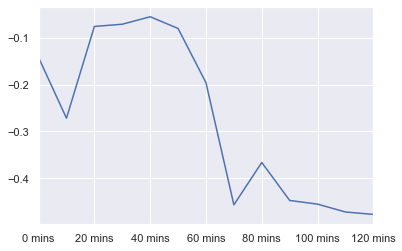

In [481]:
#Matching
epsilon = 0.0001
TE_midazolam = []
for sid in sids:
    x = Pobs_pre.loc[sid]
    t = T.loc[sid]
    if t:
        y1 = short_term_outcome.loc[sid]
        kneighbor = neighbors(x,Sc)
        y0 = short_term_outcome.loc[kneighbor].mean(axis=0)
    else:
        y0 = short_term_outcome.loc[sid]
        kneighbor = neighbors(x,St)
        y1 = short_term_outcome.loc[kneighbor].mean(axis=0)
    TE_midazolam.append((y1-y0))
TE_midazolam_df = pd.DataFrame(TE_midazolam).rename(columns={i:'%d mins'%(10*i) for i in range(f+1)})
TE_midazolam_df.mean(axis=0).plot()
# TE_midazolam_df.plot()

In [374]:
x0 = Pobs_pre.loc[time_of_int[0]>time_of_int[0].loc['sid30']+f,0:time_of_int[0].loc['sid30']].T

In [376]:
time_of_int.loc['sid30']

0    1239
Name: sid30, dtype: int64

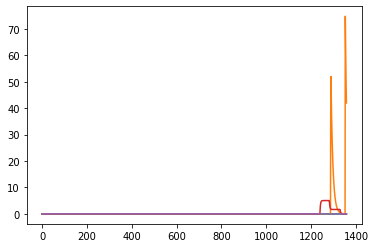

In [385]:
plt.plot(D['sid30'])